In [1]:
%load_ext autoreload
%autoreload 2

import os

from phasesim import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
files = !find data/2019-10-02-llc-accesses/ | grep -E "100*\.out"

In [122]:
results = {}
threshold = 20
for file in files:
    parts = file.split("/")
    benchmark = parts[2]
    interval = int(parts[3].split(".")[0])
    
    if benchmark not in results:
        results[benchmark] = {}
    
    results[benchmark][str(interval)] = []
    with open(file, "r") as f:
        for line in f:
            if line.find(":") > -1:
#                 if int(line.split(": ")[0].strip()) > threshold:
#                     continue
                results[benchmark][str(interval)].append([x.strip() for x in line.split(": ")])
    
    results[benchmark][str(interval)] = pd.DataFrame(results[benchmark][str(interval)]).apply(pd.to_numeric, errors='coerce')

In [123]:
def plot_results(benchmark, max_count=20):
    plt.figure()
    for interval in results[benchmark]:
        if results[benchmark][interval].shape == (0, 0):
            continue
            
        normalized = results[benchmark][interval][1] / sum(results[benchmark][interval][1])
        plt.plot(results[benchmark][interval][0], normalized.cumsum(), label=interval)
#         plt.hist(results[benchmark][interval][1], bins=20, density=True, histtype="step", cumulative=True, label=interval)
        plt.legend()
        plt.title(benchmark)
        plt.xlim(0, max_count)
        plt.ylim(0, 1)
        plt.xticks(np.arange(0, max_count + 1, 1.0))


<Figure size 432x288 with 0 Axes>

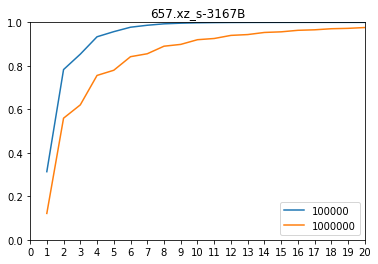

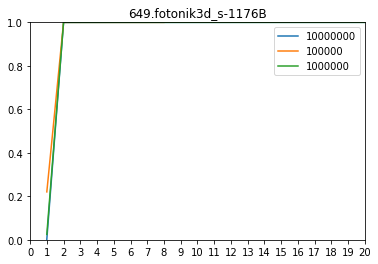

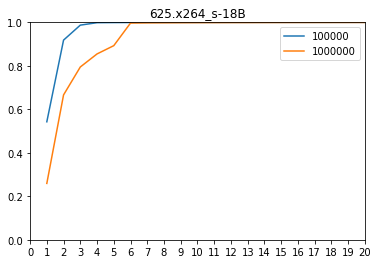

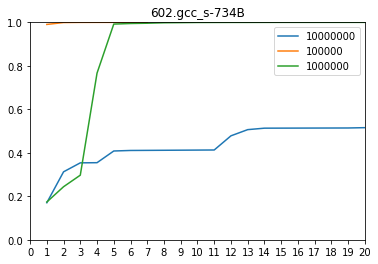

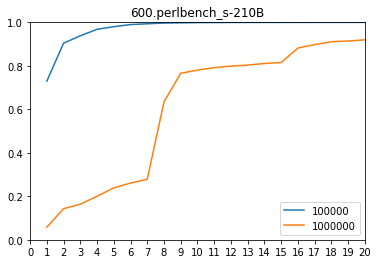

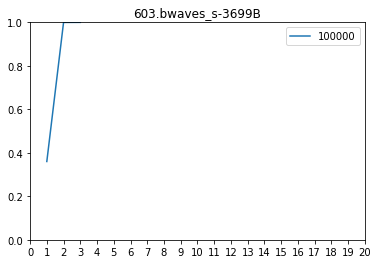

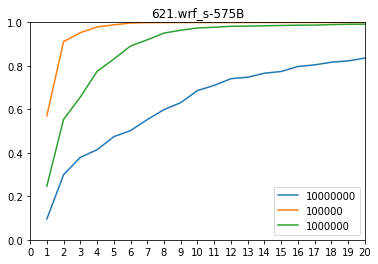

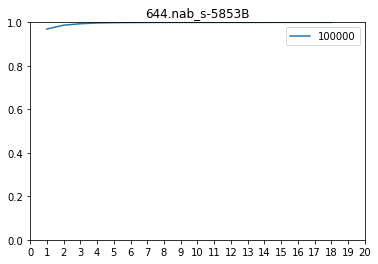

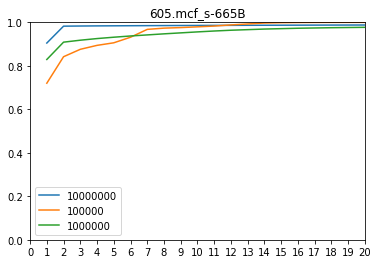

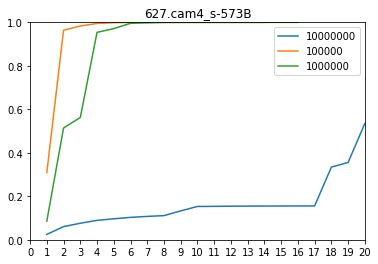

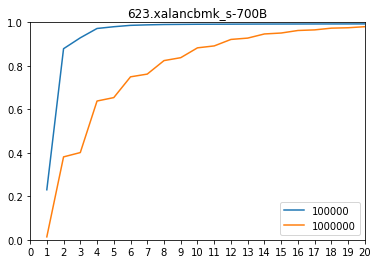

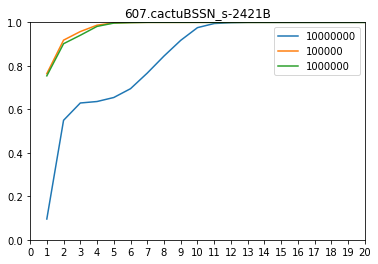

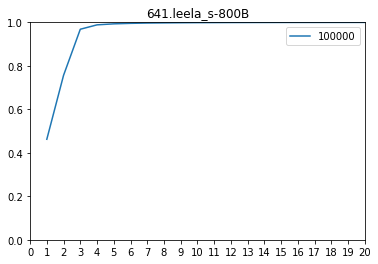

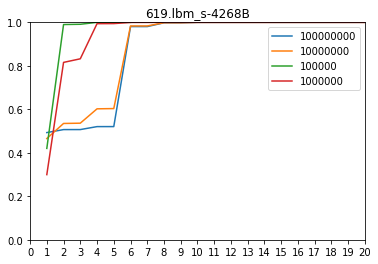

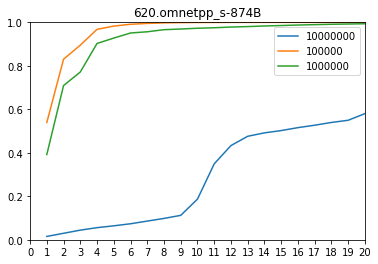

<Figure size 432x288 with 0 Axes>

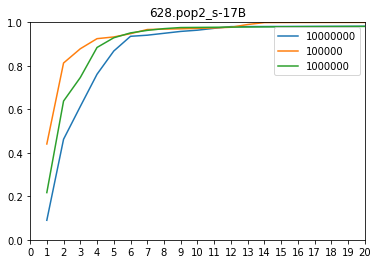

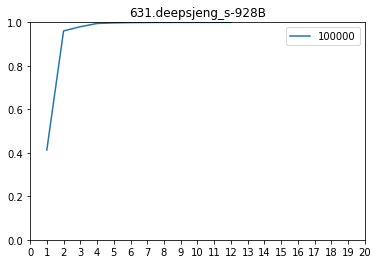

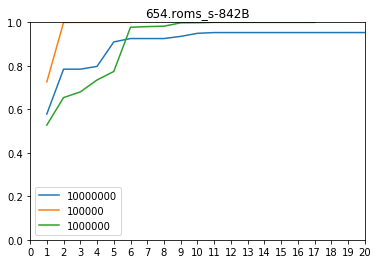

In [124]:
for benchmark in results:
    plot_results(benchmark)

In [102]:
a = results["654.roms_s-842B"]["10000000"]

In [103]:
results["654.roms_s-842B"]["10000000"].shape

(17, 2)

(array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.83333333, 1.        ]),
 array([3.00000000e+00, 8.09566550e+05, 1.61913010e+06, 2.42869365e+06,
        3.23825720e+06, 4.04782075e+06, 4.85738430e+06, 5.66694785e+06,
        6.47651140e+06, 7.28607495e+06, 8.09563850e+06, 8.90520205e+06,
        9.71476560e+06, 1.05243292e+07, 1.13338927e+07, 1.21434562e+07,
        1.29530198e+07, 1.37625834e+07, 1.45721469e+07, 1.53817105e+07,
        1.61912740e+07]),
 <a list of 1 Patch objects>)

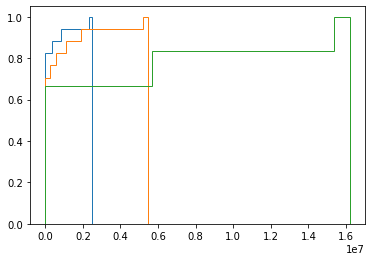

In [114]:
plt.hist(a[1], bins=20, density=True, histtype="step", cumulative=True)
plt.hist(results["654.roms_s-842B"]["1000000"][1], bins=20, density=True, histtype="step", cumulative=True)
plt.hist(results["654.roms_s-842B"]["100000"][1], bins=20, density=True, histtype="step", cumulative=True)

In [115]:
results["654.roms_s-842B"]["100000"][1]

0    16191274
1     6088927
2       10227
3          22
4          17
5           3
Name: 1, dtype: int64